In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [25]:
df = pd.read_csv("wandb_export_2022-12-07T19_27_01.034+01_00.csv", index_col=0)

models = ["unet++1", "unet++2", "unet++3"]
val_loss_unetpp_mean = df[[f"{n} - val_loss" for n in models]].mean(1)
val_loss_unetpp_std = df[[f"{n} - val_loss" for n in models]].std(1)

models = ["unet1", "unet2", "unet3"]
val_loss_unet_mean = df[[f"{n} - val_loss" for n in models]].mean(1)
val_loss_unet_std = df[[f"{n} - val_loss" for n in models]].std(1)

In [47]:
df_curves = pd.concat([val_loss_unetpp_mean, val_loss_unet_mean, val_loss_unetpp_std, val_loss_unet_std], axis=1)
df_curves.columns=["unetpp-mean", "unet-mean", "unetpp-std", "unet-std"]

df_curves = df_curves.rolling(10).mean()

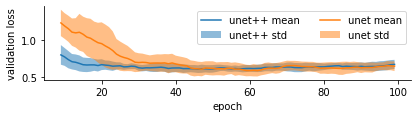

In [64]:
import seaborn as sns


fig, ax = plt.subplots(figsize=(6,1.75))
ax.plot(df_curves.index, df_curves["unetpp-mean"])
sns.despine(ax=ax)
ax.fill_between(df_curves.index, 
                df_curves["unetpp-mean"]-df_curves["unetpp-std"], 
                df_curves["unetpp-mean"]+df_curves["unetpp-std"],
                alpha=0.5)

ax.plot(df_curves.index, df_curves["unet-mean"])
ax.fill_between(df_curves.index, 
                df_curves["unet-mean"]-df_curves["unet-std"], 
                df_curves["unet-mean"]+df_curves["unet-std"],
                alpha=0.5)

ax.set_xlabel("epoch")
ax.set_ylabel("validation loss")

ax.legend(["unet++ mean", "unet++ std", "unet mean", "unet std"], ncol=2)

plt.tight_layout()
plt.savefig("trainingcurves.pdf", transparent=True, bbox_inches="tight")

unetpp-mean  unet-mean  unetpp-std  unet-std
epoch                                              
0              NaN        NaN         NaN       NaN
1              NaN        NaN         NaN       NaN
2         0.964084   1.396502    0.179699  0.148600
3         0.931352   1.353544    0.124248  0.178372
4         0.826079   1.267602    0.100285  0.169168
...            ...        ...         ...       ...
95        0.664307   0.657623    0.065552  0.053494
96        0.673781   0.674330    0.054475  0.053296
97        0.671883   0.679178    0.068186  0.066559
98        0.697143   0.660360    0.052972  0.064448
99        0.686792   0.644767    0.061250  0.084943

[100 rows x 4 columns]

<AxesSubplot:xlabel='epoch'>

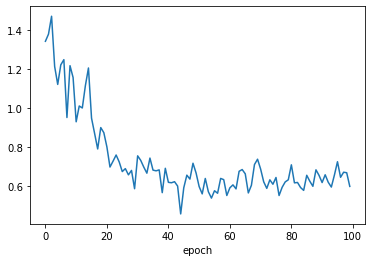

In [29]:
val_loss_unet_mean.plot()

<AxesSubplot:xlabel='epoch'>

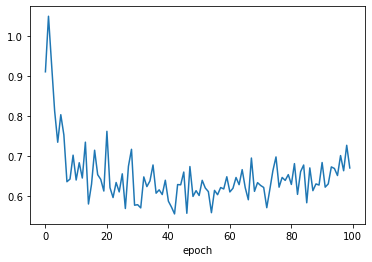

In [30]:
val_loss_unetpp_mean.plot()